<a href="https://colab.research.google.com/github/12Brainer/aa-cafe-hojas-clasificacion/blob/main/quiz2preposamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalación de bibliotecas
!pip install transformers evaluate
!pip install accelerate datasets -U
!pip install huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

1. Describir el problema y el objetivo del ejercicio (1 punto).

En este ejercicio se aborda un problema de clasificación de imágenes, enfocado en el reconocimiento de enfermedades en hojas de café. El conjunto de datos seleccionado, Coffee Leaf Diseases (Capstone Project), contiene imágenes de hojas de café divididas en cinco clases principales de enfermedad. Este dataset resulta útil para entrenar y evaluar modelos de aprendizaje profundo, ya que permite el desarrollo de sistemas capaces de diagnosticar automáticamente las condiciones de las plantas, sin necesidad de inspección manual en el campo.

El objetivo consiste en entrenar un modelo que logre identificar correctamente estas clases de enfermedad, contribuyendo al desarrollo de herramientas tecnológicas para la caficultura

 2. Seleccionar un conjunto de datos de interés a partir de la colección
 https://www.kaggle.com/discussions/general/323953 en Kaggle y referenciar formalmente
 la fuente (1 punto).

Iqbal, I. (2024). Coffee Leaf Diseases [Dataset]. Kaggle. Recuperado el 15 de agosto de 2025, de https://www.kaggle.com/datasets/izzaiqbal/capstone-project

3. Calcular estadísticas descriptivas relevantes, como el número de ejemplos por clase y el
 posible desbalance (2 puntos).

In [ ]:
# Conectar Google Drive en Colab
from google.colab import drive

drive.flush_and_unmount()
!rm -rf /content/drive/*

drive.mount('/content/drive', force_remount=True)


Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/Coffee leaf Diseases.zip" "/content/"

In [ ]:
import zipfile
import os

zip_path = "/content/Coffee leaf Diseases.zip"
extract_path = "/content/coffee_leaf_diseases"

# Crear carpeta de destino si no existe
os.makedirs(extract_path, exist_ok=True)

# Extraer
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Descomprimido en:", extract_path)

Descomprimido en: /content/coffee_leaf_diseases


,count,percent
Healthy,518,23.937153
Miner,481,22.227357
Phoma,484,22.365989
Red Spider Mite,167,7.717190
Rust,514,23.752311


Total de imágenes: 2164
Ratio entre la clase más grande y la más pequeña: 3.10


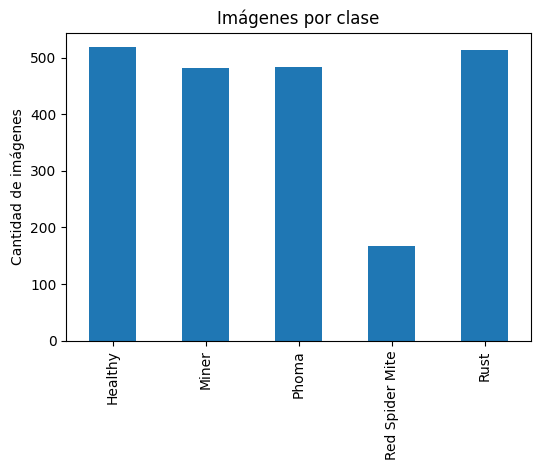

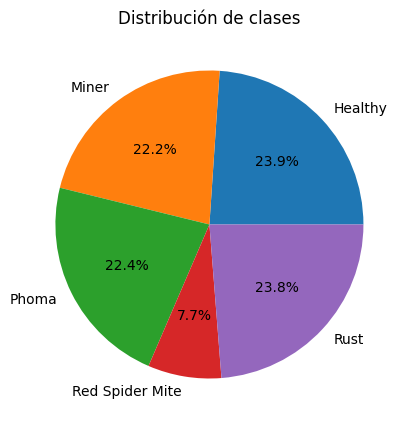

In [ ]:
# 📊 Conteo de imágenes por clase en Coffee Leaf Diseases
import os
import pandas as pd
import matplotlib.pyplot as plt

# Ruta base de clases
base_path = "/content/coffee_leaf_diseases/Coffee leaf Diseases"

# Extensiones de imagen válidas
valid_exts = {".jpg", ".jpeg", ".png"}

# Contar imágenes en cada subcarpeta
class_counts = {}
for cls in sorted(os.listdir(base_path)):
    cls_path = os.path.join(base_path, cls)
    if os.path.isdir(cls_path):
        count = sum(1 for f in os.listdir(cls_path)
                    if os.path.splitext(f)[1].lower() in valid_exts)
        class_counts[cls] = count

# Crear DataFrame con estadísticas
df_counts = pd.DataFrame.from_dict(class_counts, orient="index", columns=["count"])
df_counts["percent"] = 100 * df_counts["count"] / df_counts["count"].sum()

# Mostrar tabla
display(df_counts)

# Métricas globales
total = df_counts["count"].sum()
ratio = df_counts["count"].max() / df_counts["count"].min()
print(f"Total de imágenes: {total}")
print(f"Ratio entre la clase más grande y la más pequeña: {ratio:.2f}")

# Gráfico de barras
df_counts["count"].plot(kind="bar", figsize=(6,4), title="Imágenes por clase")
plt.ylabel("Cantidad de imágenes")
plt.show()

# Gráfico de pastel
df_counts["count"].plot(kind="pie", autopct="%1.1f%%", figsize=(5,5), title="Distribución de clases")
plt.ylabel("")
plt.show()



 4. Preparar el conjunto de datos siguiendo la estructura que dicta Hugging Face Datasets
 (https://huggingface.co/docs/datasets/en/create_dataset).
Separar
entrenamiento, validación y pruebas (5 puntos).

In [ ]:
# Preparar estructura train/validation/test con subcarpetas por clase (estilo ejemplo)
import os, pickle
from pathlib import Path

# ── Rutas globales (ya definidas antes, las reutilizamos)
extract_path = "/content/coffee_leaf_diseases"
src_classes_dir = f"{extract_path}/Coffee leaf Diseases"
dst_root = "/content/coffee_leaf_diseases_hf"

# Caché para evitar rehacer estructura
split_cache = "/content/split_done.pkl"
split_done = False
if os.path.exists(split_cache):
    try:
        with open(split_cache, "rb") as f:
            split_done = pickle.load(f).get("structure_ready", False)
    except Exception:
        split_done = False

classes = sorted([d.name for d in Path(src_classes_dir).iterdir() if d.is_dir()])
print("Clases detectadas:", classes)

if not split_done:
    # Crear carpetas raíz
    for s in ["train", "validation", "test"]:
        Path(dst_root, s).mkdir(parents=True, exist_ok=True)
        # Crear subcarpetas por clase en cada split
        for cls in classes:
            Path(dst_root, s, cls).mkdir(parents=True, exist_ok=True)

    with open(split_cache, "wb") as f:
        pickle.dump({"structure_ready": True}, f)

    print("✅ Estructura creada en:", dst_root)
else:
    print("ℹ️ Estructura ya estaba lista (caché).")


Clases detectadas: ['Healthy', 'Miner', 'Phoma', 'Red Spider Mite', 'Rust']
✅ Estructura creada en: /content/coffee_leaf_diseases_hf


In [ ]:
# Partir 70/15/15 por clase y MOVER archivos a train/validation/test (os.rename)
import os, math, random
from pathlib import Path

random_seed = 42
random.seed(random_seed)
valid_exts = {".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp"}

summary = []

for cls in classes:
    src_dir = Path(src_classes_dir, cls)
    # Listado de imágenes válidas
    files = [p.name for p in src_dir.iterdir() if p.is_file() and p.suffix.lower() in valid_exts]
    files.sort()
    n = len(files)
    if n == 0:
        continue

    # Cálculos tipo ejemplo
    train_count = math.floor(n * 0.70)
    val_count   = math.floor(n * 0.15)
    test_count  = n - train_count - val_count

    # Barajar de forma reproducible
    random.shuffle(files)

    # Rangos
    train_files = files[:train_count]
    val_files   = files[train_count:train_count+val_count]
    test_files  = files[train_count+val_count:]

    # Mover (os.rename) como en tu ejemplo
    for fname in train_files:
        os.rename(str(src_dir/fname), str(Path(dst_root, "train", cls, fname)))
    for fname in val_files:
        os.rename(str(src_dir/fname), str(Path(dst_root, "validation", cls, fname)))
    for fname in test_files:
        os.rename(str(src_dir/fname), str(Path(dst_root, "test", cls, fname)))

    summary.append((cls, n, train_count, val_count, test_count))

# Mostrar resumen por clase
import pandas as pd
df_split = pd.DataFrame(summary, columns=["class","total","train","validation","test"])
df_split.loc["TOTAL"] = ["—", df_split["total"].sum(), df_split["train"].sum(),
                         df_split["validation"].sum(), df_split["test"].sum()]
display(df_split)

print("✅ Split terminado. Revisa las carpetas en:", dst_root)


,class,total,train,validation,test
0,Healthy,518,362,77,79
1,Miner,481,336,72,73
2,Phoma,484,338,72,74
3,Red Spider Mite,167,116,25,26
4,Rust,514,359,77,78
TOTAL,—,2164,1511,323,330


✅ Split terminado. Revisa las carpetas en: /content/coffee_leaf_diseases_hf


In [ ]:
# Verificación con datasets.ImageFolder
!pip -q install datasets>=2.18 pillow

from datasets import load_dataset

data = load_dataset(
    "imagefolder",
    data_dir=dst_root,
    split={"train": "train", "validation": "validation", "test": "test"}
)

print(data)
print("Etiquetas:", data["train"].features["label"].names)

# Conteos para confirmar
import numpy as np
print("Tamaños -> train:", len(data["train"]), "| val:", len(data["validation"]), "| test:", len(data["test"]))


Resolving data files:   0%|          | 0/1511 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/323 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/330 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1511
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 323
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 330
    })
})
Etiquetas: ['Healthy', 'Miner', 'Phoma', 'Red Spider Mite', 'Rust']
Tamaños -> train: 1511 | val: 323 | test: 330


5. Crear una cuenta en Hugging Face si aún no la tiene. Publicar el dataset en su espacio de
 usuario respetando la licencia. Cree una tarjeta descriptiva del dataset (3 puntos).

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from datasets import load_dataset

# Carga desde la carpeta ya estructurada con train/validation/test
dataset = load_dataset("imagefolder", data_dir="/content/coffee_leaf_diseases_hf")

print(dataset)
print("Clases detectadas:", dataset["train"].features["label"].names)


Resolving data files:   0%|          | 0/1511 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/323 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/330 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1511
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 323
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 330
    })
})
Clases detectadas: ['Healthy', 'Miner', 'Phoma', 'Red Spider Mite', 'Rust']


In [ ]:
# Publicar dataset en Hugging Face
dataset.push_to_hub("brainer-fp66/coffee-leaf-diseases")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Uploading the dataset shards:   0%|          | 0/2 [00:00<?, ? shards/s]

Map:   0%|          | 0/756 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  854kB /  441MB            

Map:   0%|          | 0/755 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  192kB /  719MB            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Map:   0%|          | 0/323 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   1%|          | 1.46MB /  216MB            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Map:   0%|          | 0/330 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   1%|          | 1.33MB /  252MB            

CommitInfo(commit_url='https://huggingface.co/datasets/brainer-fp66/coffee-leaf-diseases/commit/6704835bd6ed307b8fe957ce89aef689ad7357d8', commit_message='Upload dataset', commit_description='', oid='6704835bd6ed307b8fe957ce89aef689ad7357d8', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/brainer-fp66/coffee-leaf-diseases', endpoint='https://huggingface.co', repo_type='dataset', repo_id='brainer-fp66/coffee-leaf-diseases'), pr_revision=None, pr_num=None)

In [ ]:
readme_text = """
# Coffee Leaf Diseases Dataset

Este dataset contiene imágenes de hojas de café en cinco clases:
- Healthy
- Miner
- Phoma
- Red Spider Mite
- Rust

## Estructura
- train: 70% de las imágenes
- validation: 15%
- test: 15%

## Uso
Este dataset fue preparado para el curso de **Aprendizaje Automático** en el ITCR,
para experimentos de clasificación de imágenes con modelos Vision Transformer (ViT).

## Licencia
Uso académico/educativo (especificar según dataset original en Kaggle).

## Autor
Publicado por [brainer-fp66](https://huggingface.co/brainer-fp66).
"""

with open("README.md", "w", encoding="utf-8") as f:
    f.write(readme_text)

from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="README.md",
    path_in_repo="README.md",
    repo_id="brainer-fp66/coffee-leaf-diseases",
    repo_type="dataset"
)
print("✅ Tarjeta descriptiva subida a Hugging Face.")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/hf_api.py:9706: UserWarning: Warnings while validating metadata in README.md:
- empty or missing yaml metadata in repo card
  warnings.warn(f"Warnings while validating metadata in README.md:\n{message}")


✅ Tarjeta descriptiva subida a Hugging Face.


8. Definir los hiperparámetros de afinamiento. Incluir al menos tasa de aprendizaje, tamaño
 de lote, número de épocas, estrategia de evaluación, criterio de parada y política de
 guardado del mejor modelo (5 puntos).

 9. Afinar el modelo con los datos de entrenamiento y validación. Publicar el mejor modelo en
 su cuenta de Hugging Face e incluir en la tarjeta del modelo los resultados de
 entrenamiento y un breve resumen metodológico (5 puntos).

 10. Evaluar el modelo en el conjunto de pruebas con Accuracy, Precision, Recall y F1. Incluir
 matriz de confusión y reporte de clasificación (3 puntos).

 11. Realizar pruebas de inferencia con al menos tres imágenes del conjunto de pruebas y
 mostrar las predicciones con sus probabilidades (1 punto).

 12. Presentar al menos tres conclusiones basadas en la evidencia obtenida (2 puntos).
 13. Documentar todas las secciones, incluyendo decisiones de diseño y posibles limitaciones
 (2 puntos).
 14. Incluir referencias en formato IEEE al final del documento (1 punto).
 15. Asegurar que los resultados de las ejecuciones sean visibles en el cuaderno, sin depender
 de corridas externas (2 puntos)

 Ejercicio 2:  Seleccione alguno de los siguientes artículos para realizar una explicación en la
 clase.
• Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., Kaiser, Ł., y
Polosukhin, I. (2017). Attention is all you need. arXiv. Recuperado de
https://arxiv.org/abs/1706.03762
 • Dosovitskiy, A., Beyer, L., Kolesnikov, A., Weissenborn, D., Zhai, X., Unterthiner, T., Dehghani,
 M., Minderer, M., Heigold, G., Gelly, S., Uszkoreit, J., y Houlsby, N. (2020). An Image is Worth
 16×16 Words: Transformers for Image Recognition at Scale. arXiv. Recuperado de
 https://arxiv.org/abs/2010.11929